## Observations and Insights 

1.Capomulin and Ramicane demonstrated more effectiveness than any other treatment regimen. When analyzing the final tumor volume by regimen, Capomulin is the first best result, with most mice showing the lowest tumor volume and,
Ramicane comes in second place.

2.Capomulin mice had a continuous reduction in tumor volume during the treatment period, the tumor decreased about
90% at the end. There is also a positive correlation between the weight of the rats and the average volume of the tumor, rats with lower weight it also has less tumor volume.

3.There were outliers that affected the results of the Infubinol regimen, however, this might not be the reason for
negative results. Both Infubinol and Ceftamin showed the median tumor volume around 40% greater than Capomulin and Ramicane. 

4.There were no problems in the data set, except for a mouse that had duplicate entries and therefore this mouse was removed from the set.


In [1]:
%matplotlib inline

In [22]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
count_mice = combined_df["Mouse ID"].count()
count_mice

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_df.loc[combined_df.duplicated(subset=['Mouse ID',"Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = combined_df.loc[combined_df['Mouse ID'] == 'g989',:]
duplicated_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#cleaned_df = combined_df[~combined_df.duplicated(subset=['Mouse ID',"Timepoint"])]
#cleaned_df = combined_df[combined_df.duplicated['Mouse ID'].isin(duplicate_mouse_id)==False]

cleaned_df = combined_df.loc[combined_df['Mouse ID'] != 'g989',:]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
count_mice_cleaned_df = cleaned_df["Mouse ID"].count()
count_mice_cleaned_df 


1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_drug = cleaned_df.groupby("Drug Regimen")
regimen_mean = grouped_drug["Tumor Volume (mm3)"].mean()
regimen_median = grouped_drug["Tumor Volume (mm3)"].median()
regimen_var = grouped_drug["Tumor Volume (mm3)"].var()
regimen_std = grouped_drug["Tumor Volume (mm3)"].std()
regimen_sem = grouped_drug["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean":regimen_mean,
                            "Median":regimen_median,
                            "Variance":regimen_var,
                            "Std Deviation":regimen_std,
                            "SEM":regimen_sem})
summary_stats


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
stats = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'])
stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

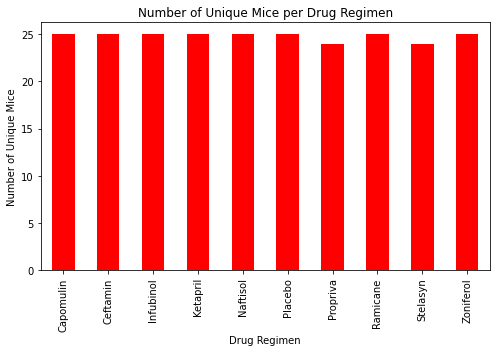

In [34]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_mice_per_drug = cleaned_df.groupby("Drug Regimen")["Mouse ID"].nunique()

# Generate the bar plot
total_mice_per_drug.plot(kind='bar', color="red", title="Number of Unique Mice per Drug Regimen",figsize=(7,5))
plt.ylabel("Number of Unique Mice")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/total_mice_per_drug.png")
            
# Diplay plot
plt.show()

In [35]:
# Converting series to DF
df_mice = total_mice_per_drug.to_frame()
df_mice.index.name = 'Drug Regimen'
df_mice.reset_index(level=None, drop=False, inplace=True)

df_mice.head()

,Drug Regimen,Mouse ID
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25


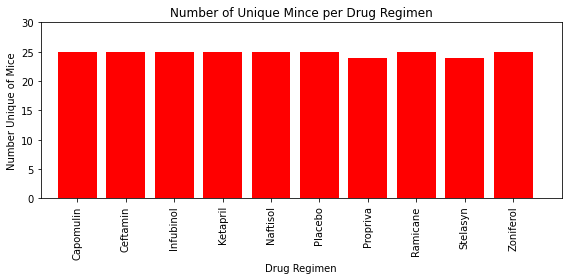

In [36]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(0,len(df_mice))
ticks = [value for value in x_axis]

plt.figure(figsize=(8,4))
plt.bar(x_axis, df_mice["Mouse ID"], color="r", align="center")
plt.xticks(ticks,df_mice["Drug Regimen"], rotation="vertical")

# Set the limits of the x and y axis
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(df_mice["Mouse ID"])+5)

# Give the chart a title, x label, and y label, give proper layot
plt.title("Number of Unique Mince per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number Unique of Mice")
plt.tight_layout()
plt.show()

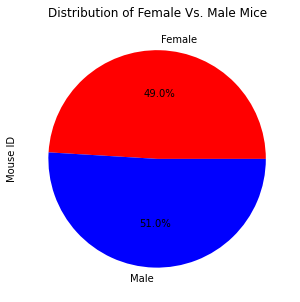

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distr = cleaned_df.groupby("Sex")["Mouse ID"].count()

# Set details for the plot
colors=['red','blue']
plt.figure()
gender_distr.plot(kind='pie', figsize=(5, 5),title="Distribution of Female Vs. Male Mice",autopct="%1.1F%%", colors=colors)
plt.show()

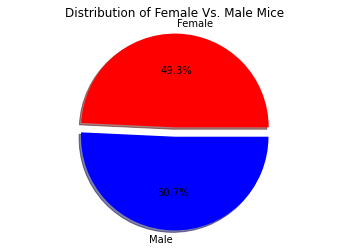

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert series into dataframe
sex_df = gender_distr.to_frame()
sex_df.index.name = 'Sex'
sex_df.reset_index(level=None, drop=False, inplace=True)
renamed_sex_df = sex_df.rename(columns={"Sex":"Sex", "Mouse ID":"Distribution of Mice"})
renamed_sex_df

# Passing plot details
sex = ["Female","Male"]
count = [930,958]
x_axis = np.arange(0,len(sex))
explode = (0.1,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.figure()
colors= ['red','blue']
plt.title("Distribution of Female Vs. Male Mice")
plt.pie(count,labels=sex,colors=colors,autopct="%1.1f%%",shadow=True, explode=explode)

# Create axes which are equal so we have a perfect circle
plt.axis('equal')

# Save the figure
plt.savefig("output_data/distribution_by_gender.png")
            
# Diplay plot
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tp_and_tumor_vol = max_timepoint.merge(cleaned_df, on=["Mouse ID","Timepoint"], how='left')

max_tp_and_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_regimen:
    final_tumor_volume = max_tp_and_tumor_vol.loc[max_tp_and_tumor_vol['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    tumor_volume.append(final_tumor_volume)
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
       
    outlier_tumor_vol = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The median of tumor volume is: {quartiles[0.5]} ")
    print(f"Outliers using upper and lower bounds: {outlier_tumor_vol}")
    print('-------------------------')

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The median of tumor volume is: 38.125164399999996 
Outliers using upper and lower bounds: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The median of tumor volume is: 36.56165229 
Outliers using upper and lower bounds: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The median of tumor volume is: 60.16518046 
Outliers using upper and lower bounds: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
-------------------------
The lower q

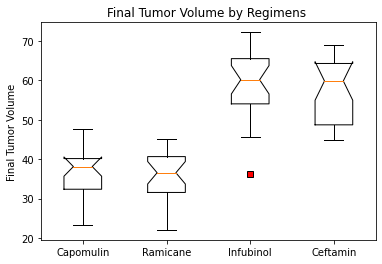

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(tumor_volume, labels=drug_regimen, notch="True", flierprops=red_square)
plt.title("Final Tumor Volume by Regimens ")
plt.ylabel('Final Tumor Volume')

# Save the figure
plt.savefig("output_data/finalTumor_byRegimen.png")
            
# Diplay plot
plt.show()

## Line and Scatter Plots

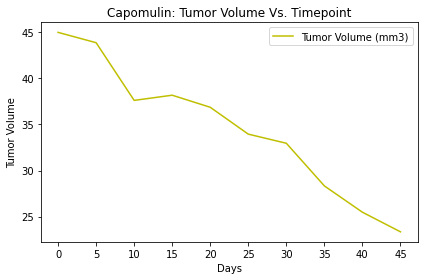

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Select a mouse treated with Capomulin
a_mouse_capomulin = cleaned_df.loc[cleaned_df['Mouse ID'] == 's185',:]

# Getting data for the plot
a_mouse_capomulin = a_mouse_capomulin[['Tumor Volume (mm3)','Timepoint']]

# Set variables
avg_tumor = a_mouse_capomulin['Tumor Volume (mm3)']
timepoint = a_mouse_capomulin['Timepoint']

# Plot the line that will be used to track a mouse's treatment over the days
plt.plot(timepoint,avg_tumor, c='y')

# Give the plot a title, x label, and y label, give proper layout
plt.title('Capomulin: Tumor Volume Vs. Timepoint')
plt.xlabel('Days')
plt.ylabel('Tumor Volume')
plt.xticks(np.arange(min(timepoint), max(timepoint)+1, 5))
plt.legend(['Tumor Volume (mm3)'])
plt.tight_layout()

# Save the figure
plt.savefig("output_data/capomulin_result.png")
            
# Diplay plot
plt.show()

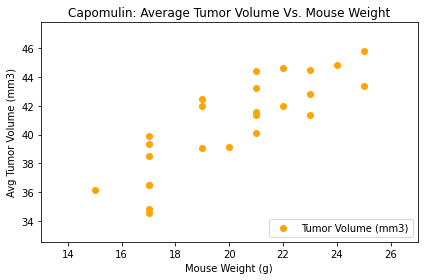

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Getting data for the plot
capomulin_vol_weight = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin')]
capomulin_avg = capomulin_vol_weight.groupby(['Mouse ID']).mean()

# Set variables
mouse_weight = capomulin_avg['Weight (g)']
avg_tumor= capomulin_avg['Tumor Volume (mm3)']

# Generate the scatter plot
plt.scatter(mouse_weight,avg_tumor,marker="o", color='orange')

# Give the plot a legend, atitle, x label, and y label 
plt.legend(['Tumor Volume (mm3)'],loc='lower right')
plt.title('Capomulin: Average Tumor Volume Vs. Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

# Set the limits of the x and y axis
plt.xlim(min(mouse_weight) -2, max(mouse_weight)+2)
plt.ylim(min(avg_tumor) -2, max(avg_tumor)+2)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/capomulin_result2.png")
            
# Diplay plot
plt.show()

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f'The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mouse_weight,avg_tumor)[0],2)} , for the Capomulin regimen.')


The correlation coefficient between mouse weight and average tumor volume is 0.84 , for the Capomulin regimen.


In [46]:
# Perform a linear regression on mouse weight and average tumor volume
slope, intercep, rvalue, pvalue, std_err = stats.linregress(mouse_weight,avg_tumor)

In [47]:
# Create equation of line 
line_eq = slope * mouse_weight + intercep

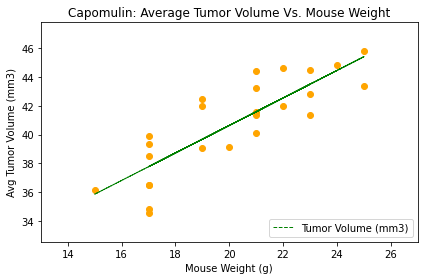

In [48]:
# Plotting scatter and linear model for weight versus tumor volume
plt.scatter(mouse_weight,avg_tumor, marker="o", color='orange')
plt.plot(mouse_weight,line_eq,"--",linewidth=1, color="g")

# Give the plot a legend, atitle, x label, and y label 
plt.legend(['Tumor Volume (mm3)'],loc='lower right')
plt.title('Capomulin: Average Tumor Volume Vs. Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

# Set the limits of the x and y axis
plt.xlim(min(mouse_weight) -2, max(mouse_weight)+2)
plt.ylim(min(avg_tumor) -2, max(avg_tumor)+2)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/capomulin_correlation.png")
            
# Diplay plot
plt.show()